# Global Power Plant Database Prediction

The Global Power Plant centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available

IMPORT THE REQUIRED LIBRARY

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import zscore
from sklearn import metrics

In [88]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor,ExtraTreesClassifier,ExtraTreesRegressor,AdaBoostClassifier,AdaBoostRegressor,BaggingClassifier,BaggingRegressor
from sklearn.metrics import RocCurveDisplay,roc_auc_score,accuracy_score,mean_absolute_error,mean_squared_error, r2_score, classification_report, confusion_matrix,auc, roc_curve
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor


DATA COLLECTION

In [4]:
df=pd.read_csv('power.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


EDA

In [5]:
df.shape

(907, 27)

In [6]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [8]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [9]:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [10]:
df['Total']=df['generation_gwh_2014']+df['generation_gwh_2015']+df['generation_gwh_2016']+df['generation_gwh_2017']+df['generation_gwh_2018']

In [11]:
df.head(1)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh,Total
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dropping the columns that do not have any non-null value and null data more than 50 %

In [12]:
colum = ['country', 'country_long','other_fuel1','other_fuel2','other_fuel3','owner', 'generation_data_source', 
         'estimated_generation_gwh','wepp_id','generation_gwh_2019','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015',
        'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
df.drop(columns=colum, inplace=True)

In [13]:
df.shape

(907, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   907 non-null    object 
 1   gppd_idnr              907 non-null    object 
 2   capacity_mw            907 non-null    float64
 3   latitude               861 non-null    float64
 4   longitude              861 non-null    float64
 5   primary_fuel           907 non-null    object 
 6   commissioning_year     527 non-null    float64
 7   source                 907 non-null    object 
 8   url                    907 non-null    object 
 9   geolocation_source     888 non-null    object 
 10  year_of_capacity_data  519 non-null    float64
 11  Total                  391 non-null    float64
dtypes: float64(6), object(6)
memory usage: 85.2+ KB


In [15]:
df.nunique()

name                     907
gppd_idnr                907
capacity_mw              361
latitude                 836
longitude                827
primary_fuel               8
commissioning_year        73
source                   191
url                      304
geolocation_source         3
year_of_capacity_data      1
Total                    381
dtype: int64

Visualization of the null values

In [16]:
df.isna().sum()

name                       0
gppd_idnr                  0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
Total                    516
dtype: int64

we observe that there is float and object type of data having null values

In [17]:
ccol = df.select_dtypes(include=['object']).columns
print("Categorical columns are:",ccol)
print("\n")

ncol = df.select_dtypes(include=['int64','float64']).columns
print("Numerical columns are:",ncol)

Categorical columns are: Index(['name', 'gppd_idnr', 'primary_fuel', 'source', 'url',
       'geolocation_source'],
      dtype='object')


Numerical columns are: Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'year_of_capacity_data', 'Total'],
      dtype='object')


Replace for float type

In [18]:
to_impute = ['latitude', 'longitude','year_of_capacity_data', 'commissioning_year','Total']
i_i = IterativeImputer()
df[to_impute] = i_i.fit_transform(df[to_impute])

Replace for object type

In [19]:
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [20]:
df.isna().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
url                      0
geolocation_source       0
year_of_capacity_data    0
Total                    0
dtype: int64

<Axes: >

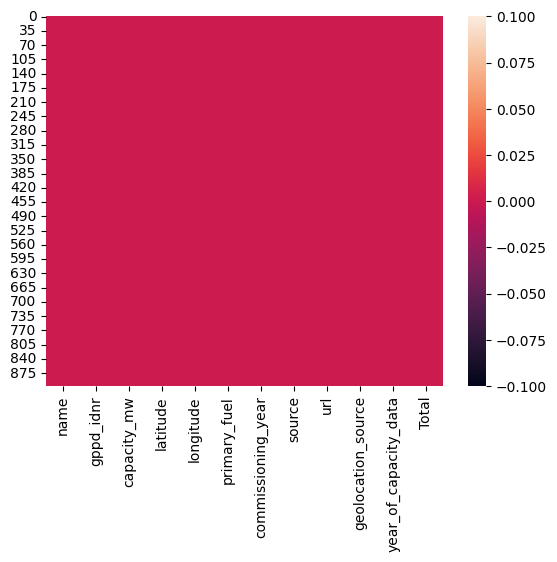

In [21]:
sns.heatmap(df.isnull())

In [22]:
df.duplicated().sum()

0

In [23]:
df.drop(['name','year_of_capacity_data'],inplace=True,axis=1)

In [24]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [25]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [26]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,Total
count,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.200178,77.465710,1996.555977,13081.977349
std,590.085456,6.082313,4.813891,13.056788,14020.124915
min,0.000000,8.168900,68.644700,1927.000000,-2505.135592
25%,16.725000,17.072000,74.388900,1994.279581,6151.891425
50%,59.200000,21.533700,76.957000,1996.555977,12439.281262
75%,385.250000,25.176450,79.206100,2003.000000,13621.698954
max,4760.000000,34.649000,95.408000,2018.000000,156908.000000


Observation- expect 'capacity_mw', all the feature means > std deviation, most has minimum as 0 , and it appears that capacity_mw has outliers

DATA VISUALIZATION

Univarient Exploratory data Analysis


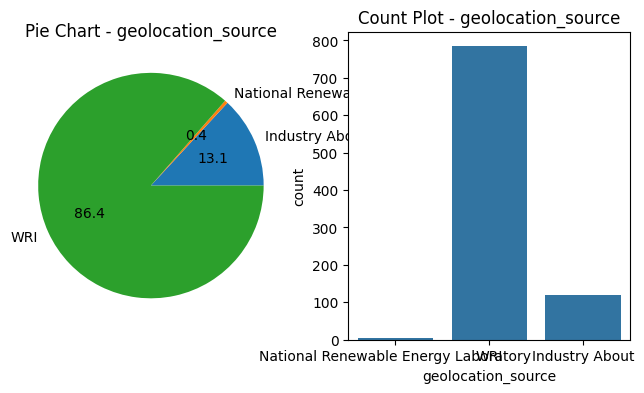

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

df.groupby('geolocation_source').size().plot(kind='pie', autopct='%.1f', ax=axes[0])
axes[0].set_title('Pie Chart - geolocation_source')

sns.countplot(x='geolocation_source', data=df, ax=axes[1])
axes[1].set_title('Count Plot - geolocation_source')

plt.show()

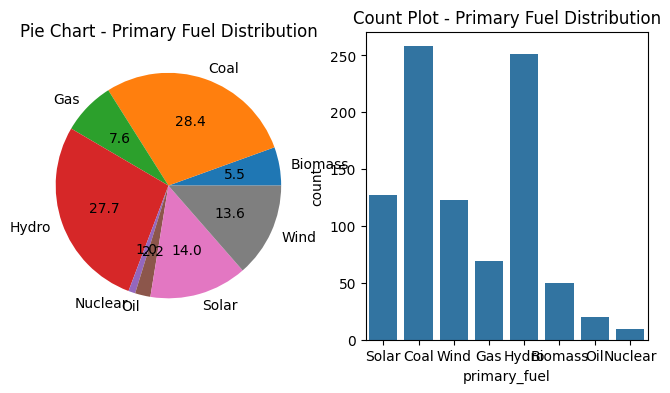

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

df.groupby('primary_fuel').size().plot(kind='pie', autopct='%.1f', ax=axes[0])
axes[0].set_title('Pie Chart - Primary Fuel Distribution')

sns.countplot(x='primary_fuel', data=df, ax=axes[1])
axes[1].set_title('Count Plot - Primary Fuel Distribution')

plt.show()

Bivarient Exploratory data Analysis

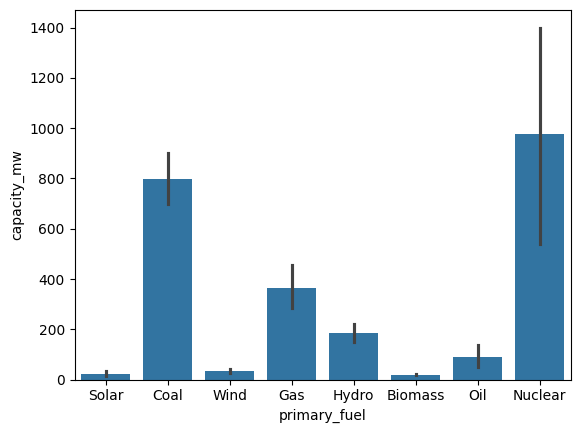

In [29]:
sns.barplot(x='primary_fuel', y='capacity_mw', data=df)
plt.show()

<Axes: xlabel='gppd_idnr', ylabel='capacity_mw'>

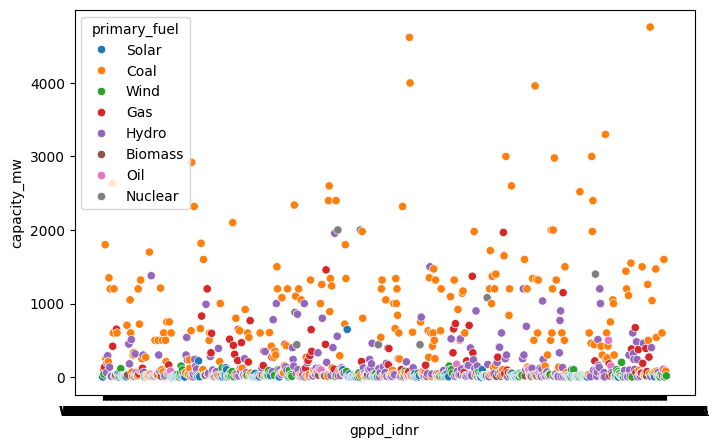

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='gppd_idnr',y='capacity_mw',hue='primary_fuel', data=df)

<Axes: xlabel='commissioning_year', ylabel='capacity_mw'>

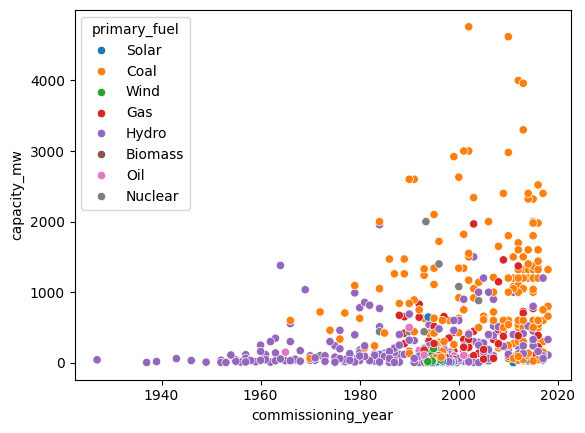

In [31]:
sns.scatterplot(y='capacity_mw',x='commissioning_year',hue='primary_fuel', data=df)

<Axes: xlabel='longitude', ylabel='latitude'>

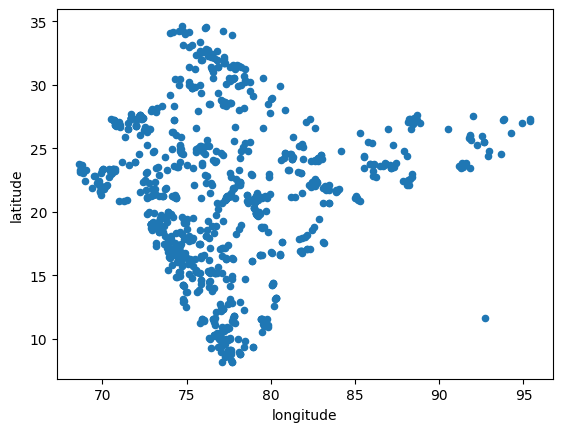

In [32]:
df.plot(x="longitude", y="latitude", kind="scatter")

LabelEncode for categorical data

In [33]:
LE = LabelEncoder()
for i in df.select_dtypes(include='object').columns:
    df[i] = LE.fit_transform(df[i])
df.head()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,Total
0,657,2.5,28.1839,73.2407,6,2011.000000,109,128,1,16813.456062
1,519,98.0,24.7663,74.6090,1,1996.745026,174,173,2,13094.875554
2,853,39.2,21.9038,69.3732,7,1994.744603,21,205,2,12159.276445
3,0,135.0,23.8712,91.3602,2,2004.000000,22,58,2,3637.554320
4,1,1800.0,21.9603,82.4091,1,2015.000000,22,58,2,27859.499736


multi-feature data analysis/

<Figure size 1200x800 with 0 Axes>

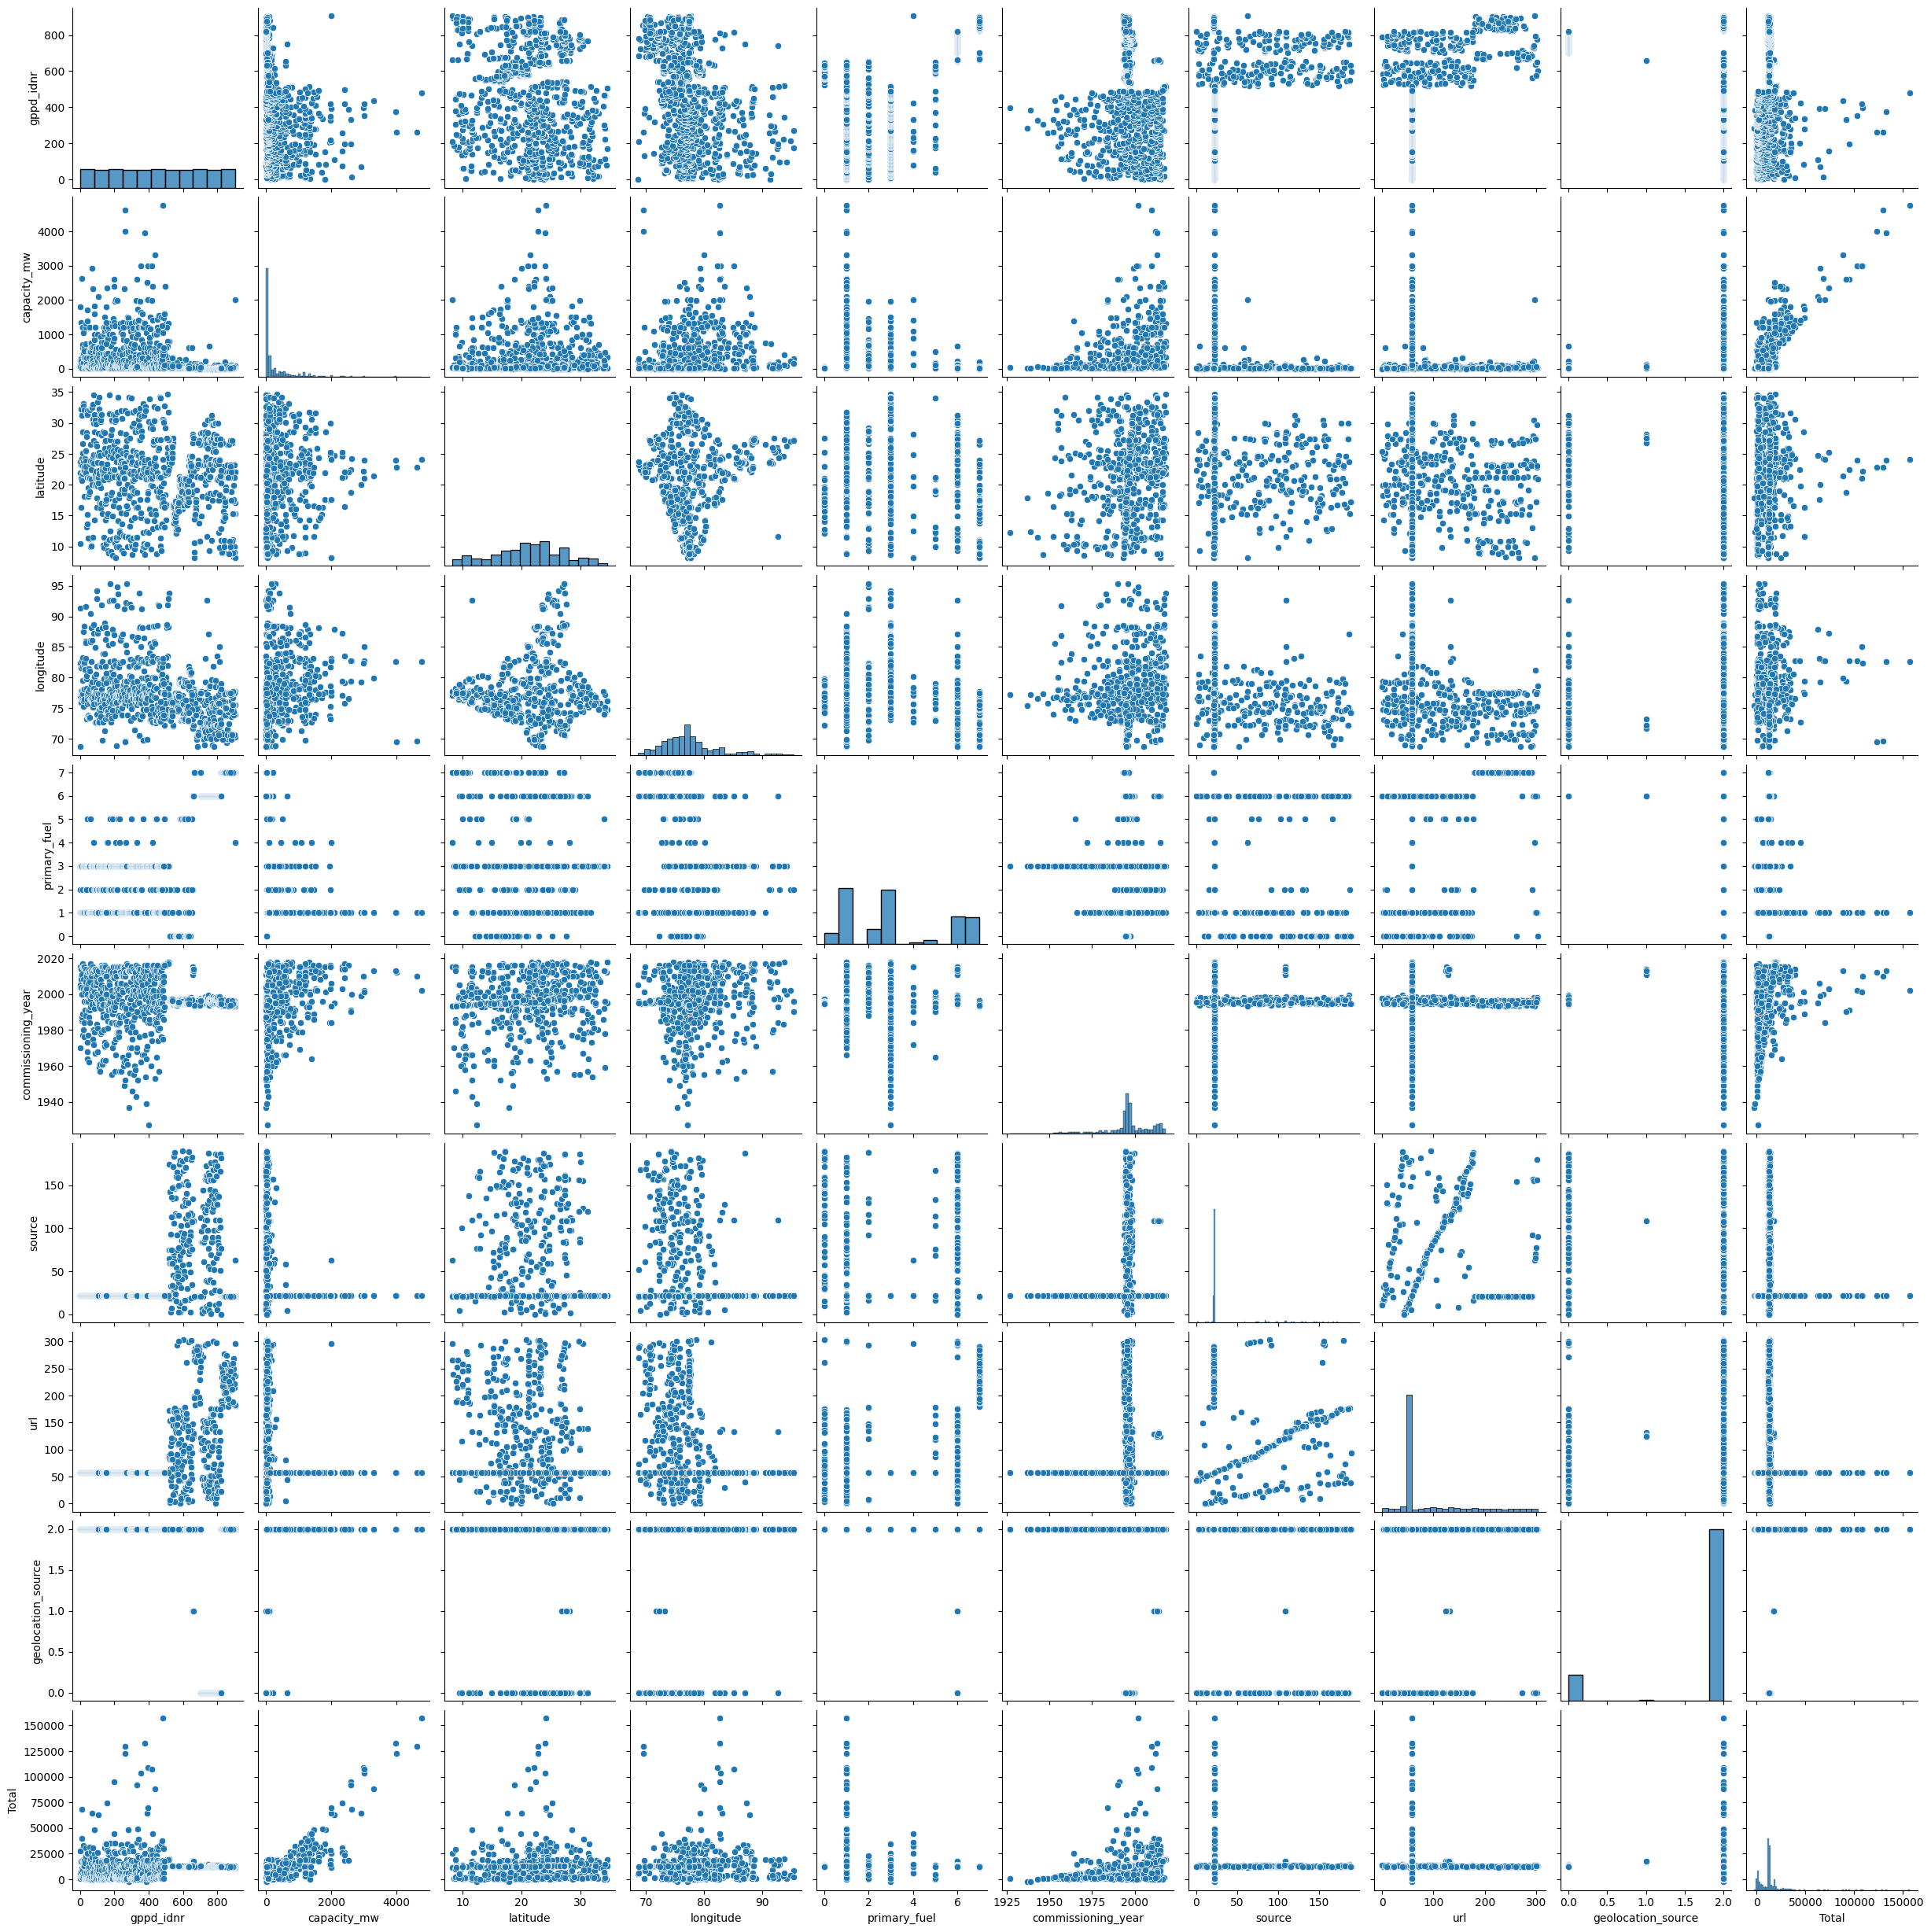

In [34]:
plt.figure(figsize=(12,8))
sns.pairplot(df)

checking for outliers


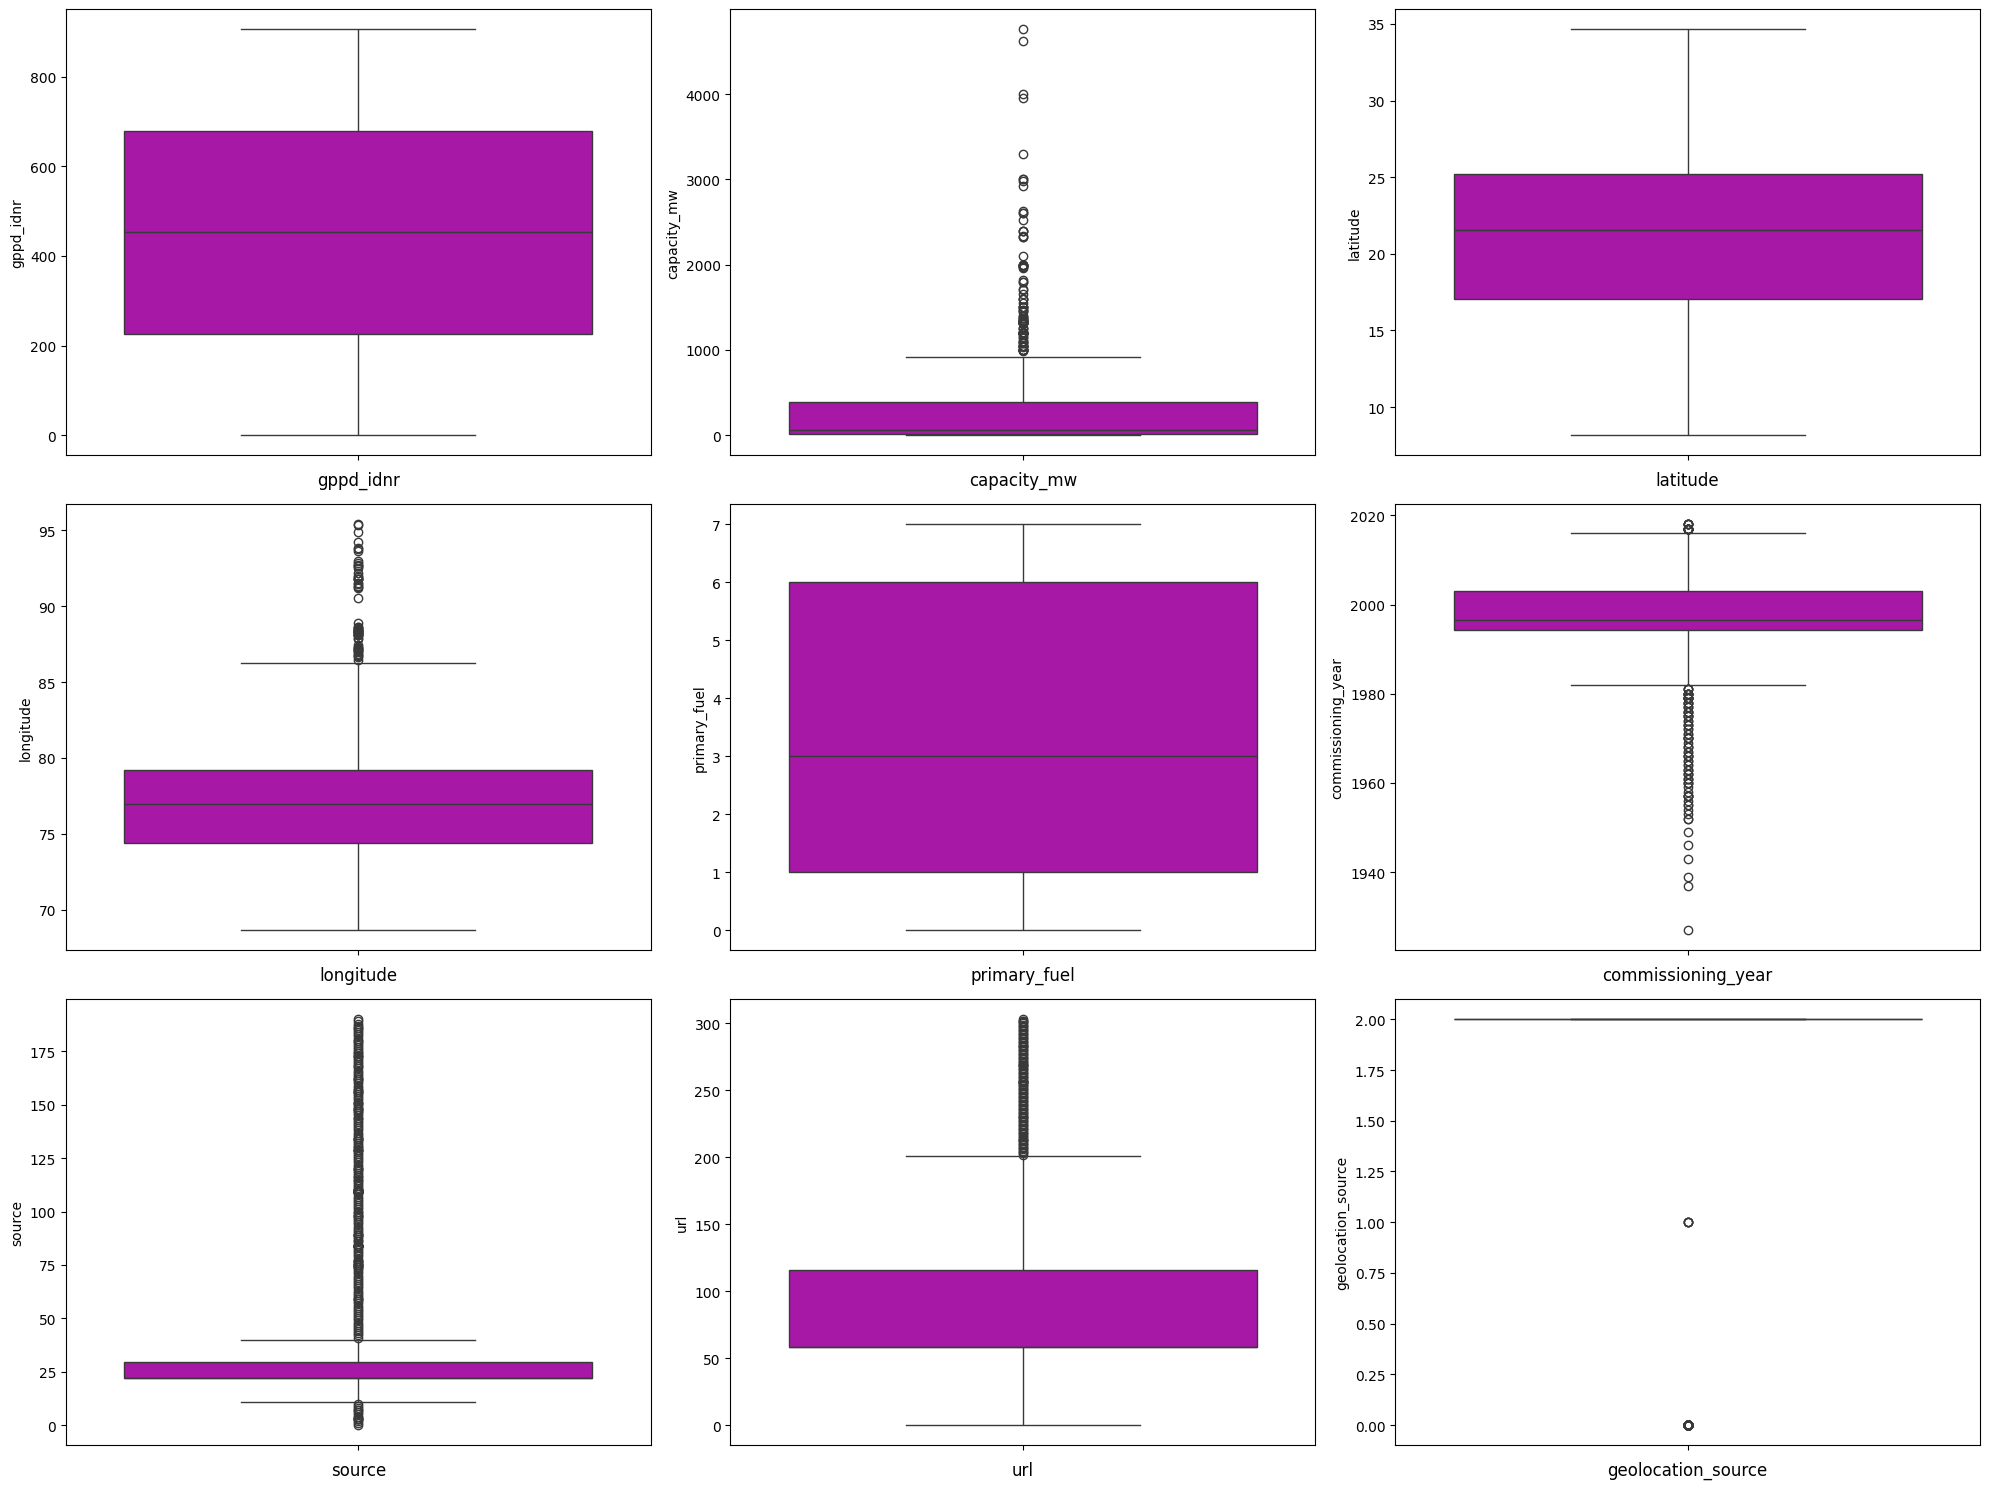

In [35]:
plt.figure(figsize=(20,15),facecolor="white")
pltno=1
for i in df:
    if pltno<=9:
        plt.subplot(3,3,pltno)
        sns.boxplot(df[i],color="m")
        plt.xlabel(i,fontsize=12)
    pltno+=1
plt.tight_layout()

OUTLIER REMOVAL

In [36]:
df.shape

(907, 10)

In [37]:
# METHOD 1
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]

In [38]:
df1.shape

(836, 10)

In [39]:
print("data loss ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss  7.82800441014333


In [40]:
# METHOD 2
q1=df.quantile(.25)
q3=df.quantile(.75)
iqr=q3-q1
df2=df[~((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))).any(axis=1)]

In [41]:
df2.shape

(311, 10)

In [42]:
df=df1

FINDING SKEWNESS OF DATA

In [43]:
df.skew()

gppd_idnr            -0.048633
capacity_mw           1.953584
latitude             -0.117297
longitude             0.907592
primary_fuel          0.414735
commissioning_year   -0.701276
source                1.788418
url                   1.436046
geolocation_source   -2.108238
Total                 1.061894
dtype: float64

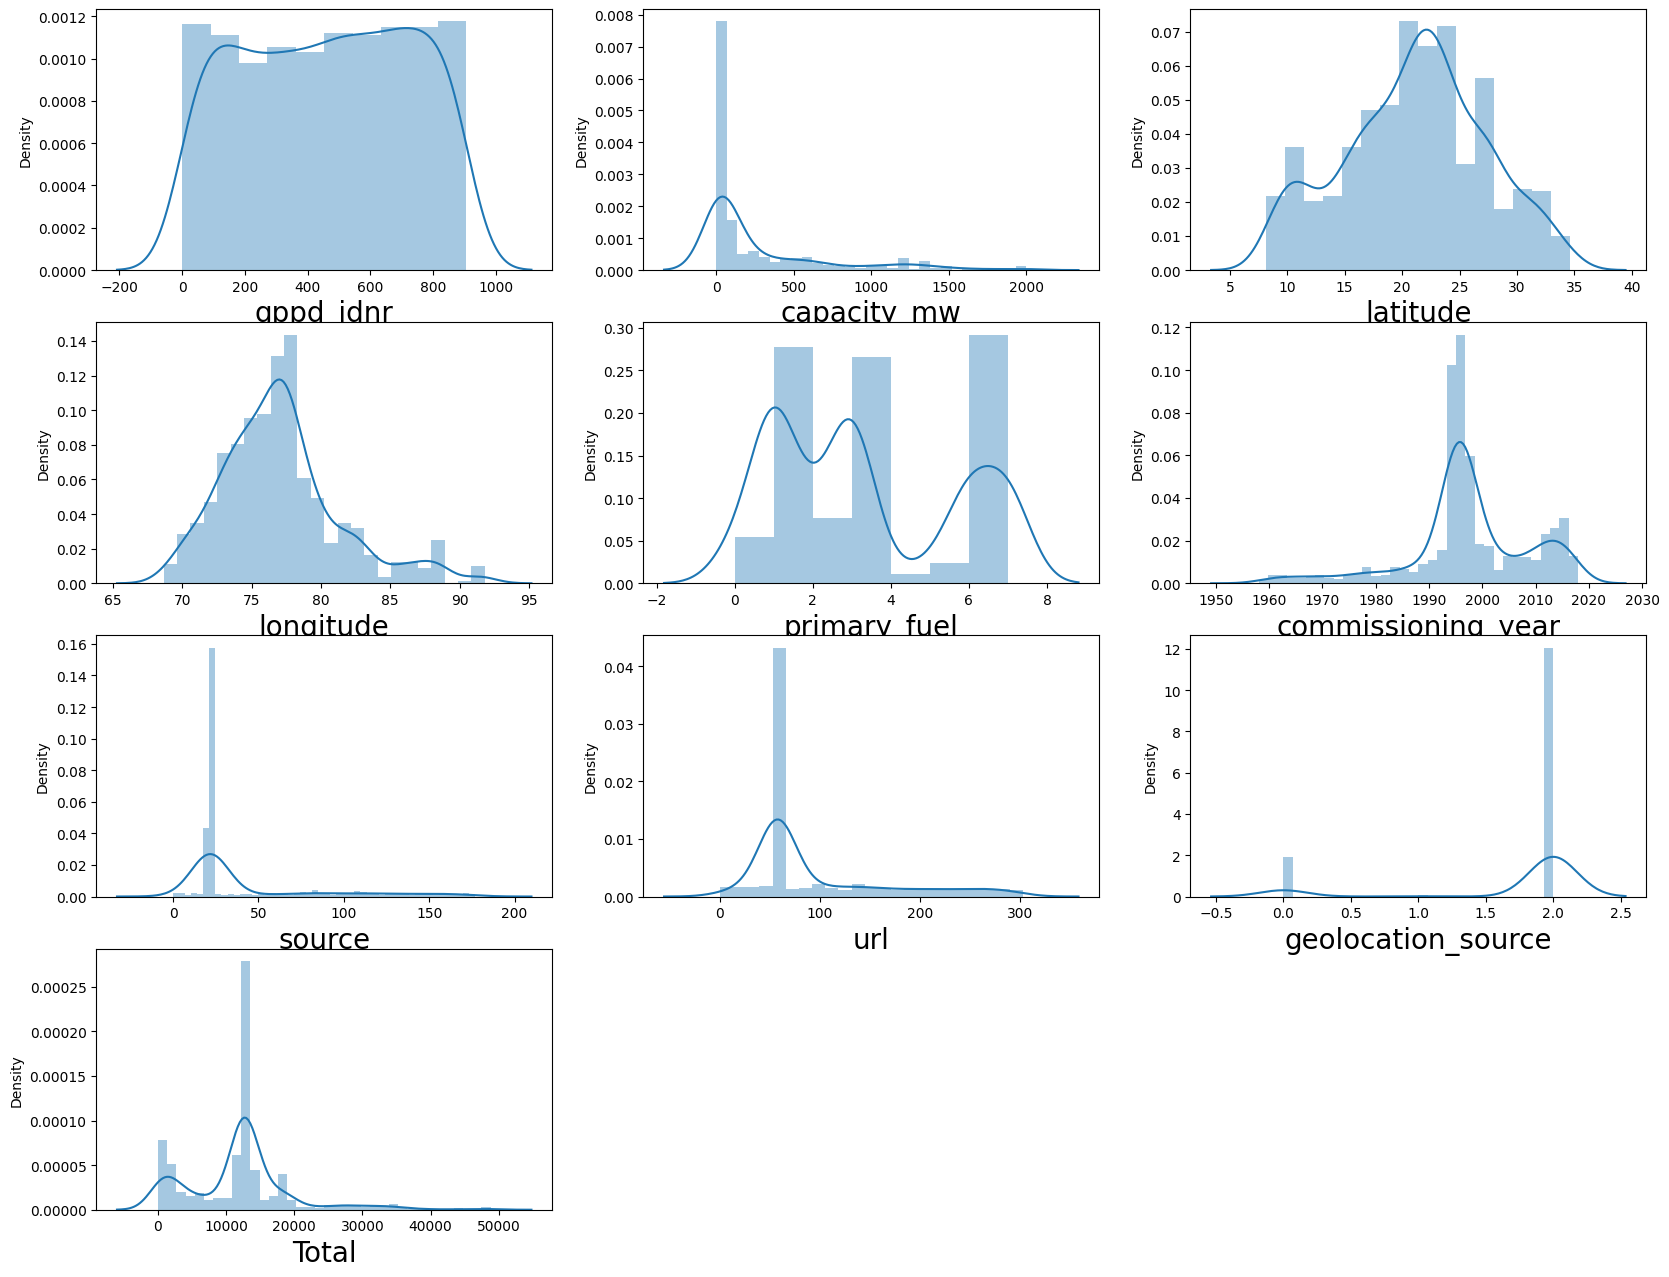

In [44]:
plt.figure(figsize=(20,40),facecolor='white')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

FINDING DATA CORRELATION

In [45]:
df.corr()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,Total
gppd_idnr,1.000000,-0.406596,-0.096846,-0.388408,0.619271,-0.040069,0.401245,0.598275,-0.454343,0.154639
capacity_mw,-0.406596,1.000000,0.049463,0.261401,-0.412094,0.323131,-0.273432,-0.279375,0.238538,0.529907
latitude,-0.096846,0.049463,1.000000,-0.016320,-0.010849,0.153188,0.073791,-0.132072,-0.193855,0.066060
longitude,-0.388408,0.261401,-0.016320,1.000000,-0.390057,0.187355,-0.247824,-0.306101,0.276432,0.033586
primary_fuel,0.619271,-0.412094,-0.010849,-0.390057,1.000000,-0.180646,0.063950,0.606105,-0.470549,-0.079585
commissioning_year,-0.040069,0.323131,0.153188,0.187355,-0.180646,1.000000,-0.021497,-0.072839,0.020040,0.327485
source,0.401245,-0.273432,0.073791,-0.247824,0.063950,-0.021497,1.000000,0.129045,-0.521474,0.079630
url,0.598275,-0.279375,-0.132072,-0.306101,0.606105,-0.072839,0.129045,1.000000,-0.000793,0.059572
geolocation_source,-0.454343,0.238538,-0.193855,0.276432,-0.470549,0.020040,-0.521474,-0.000793,1.000000,-0.065583
Total,0.154639,0.529907,0.066060,0.033586,-0.079585,0.327485,0.079630,0.059572,-0.065583,1.000000


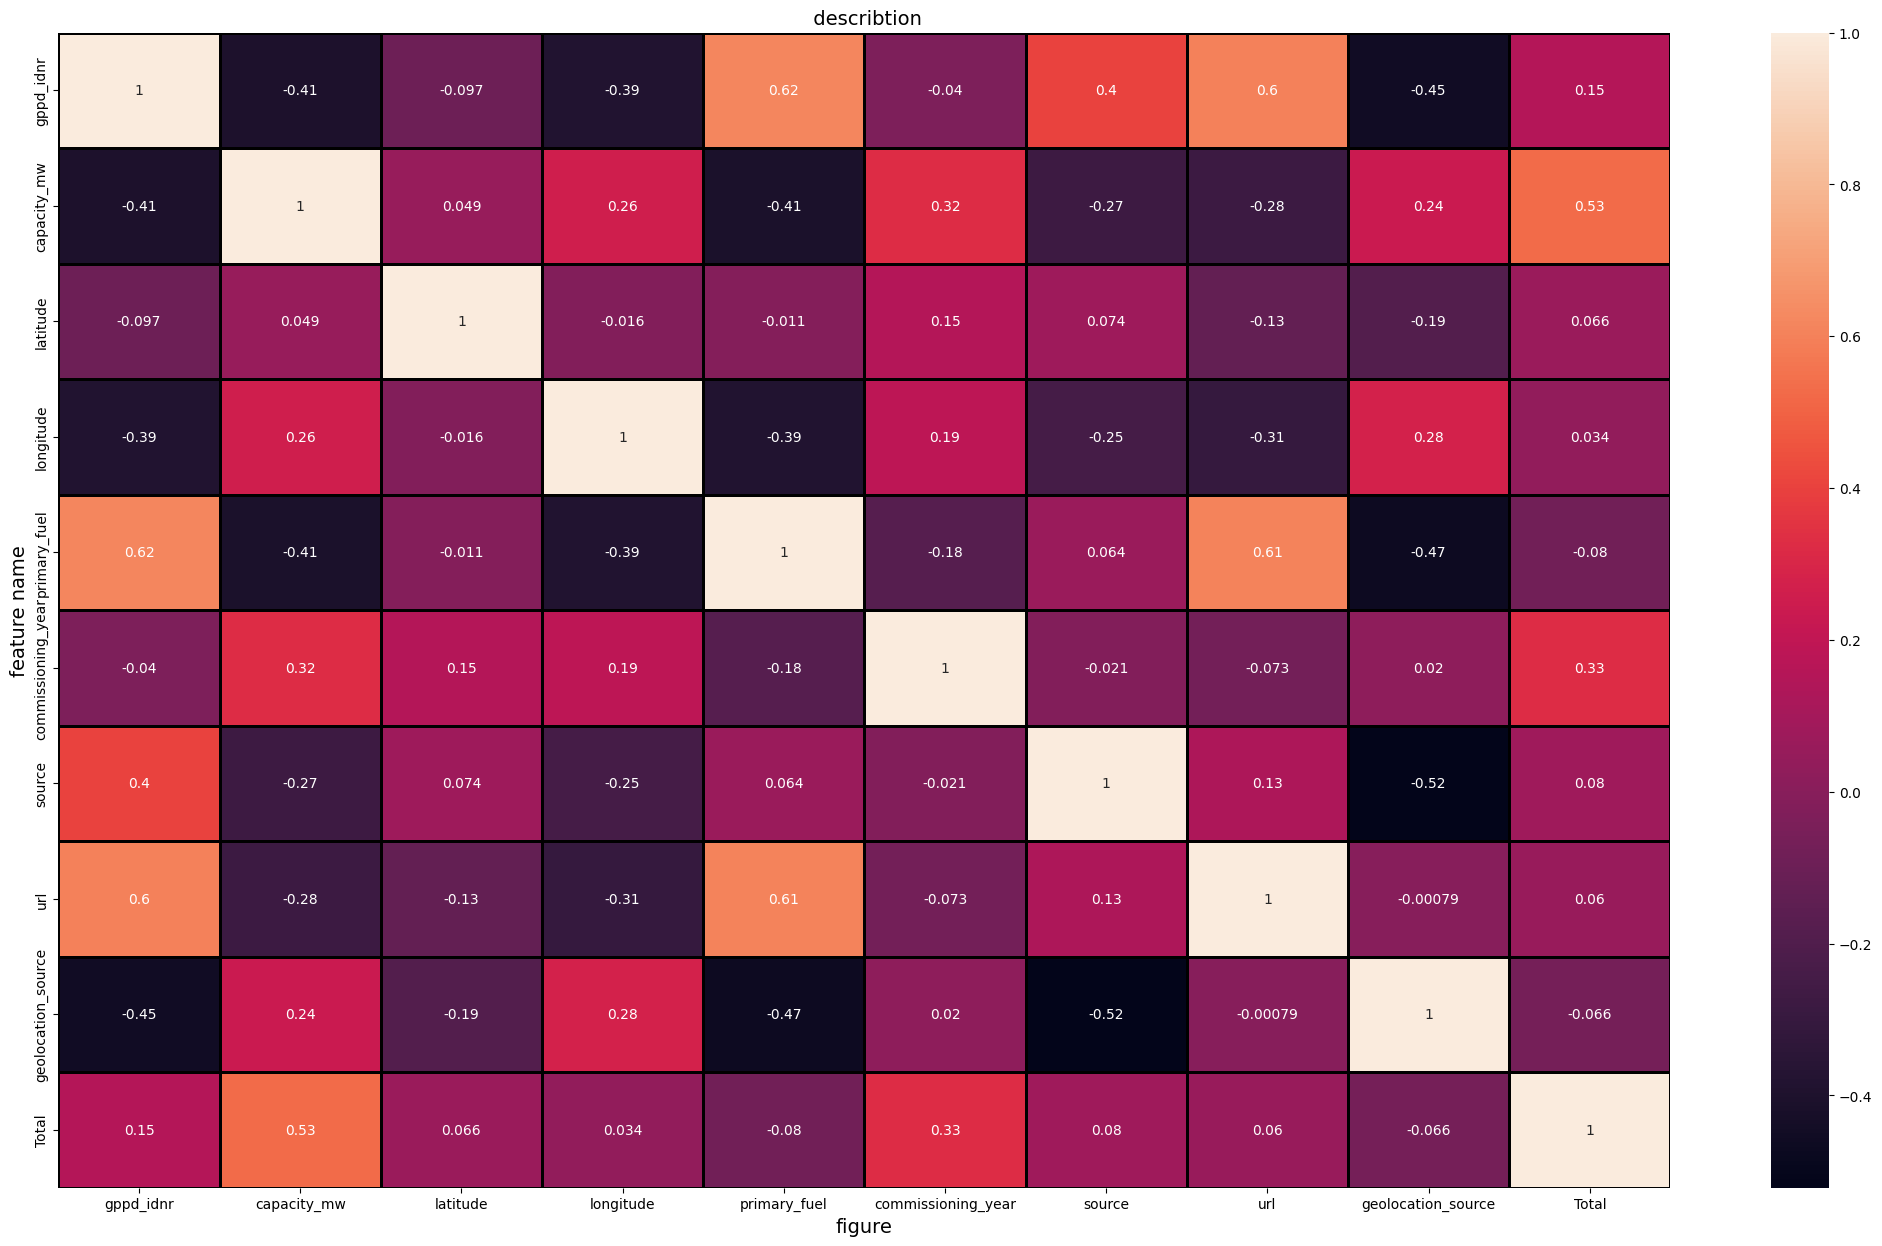

In [46]:
plt.figure(figsize = (26, 15))
sns.heatmap(df.corr(),linewidths=0.8,fmt='.2g',linecolor="black",annot=True)
plt.xlabel('figure',fontsize=14)
plt.ylabel("feature name",fontsize=14)
plt.title(" describtion",fontsize=14)
plt.show()

# Model with Target : primary_fuel

Analysing the Feature with target feature

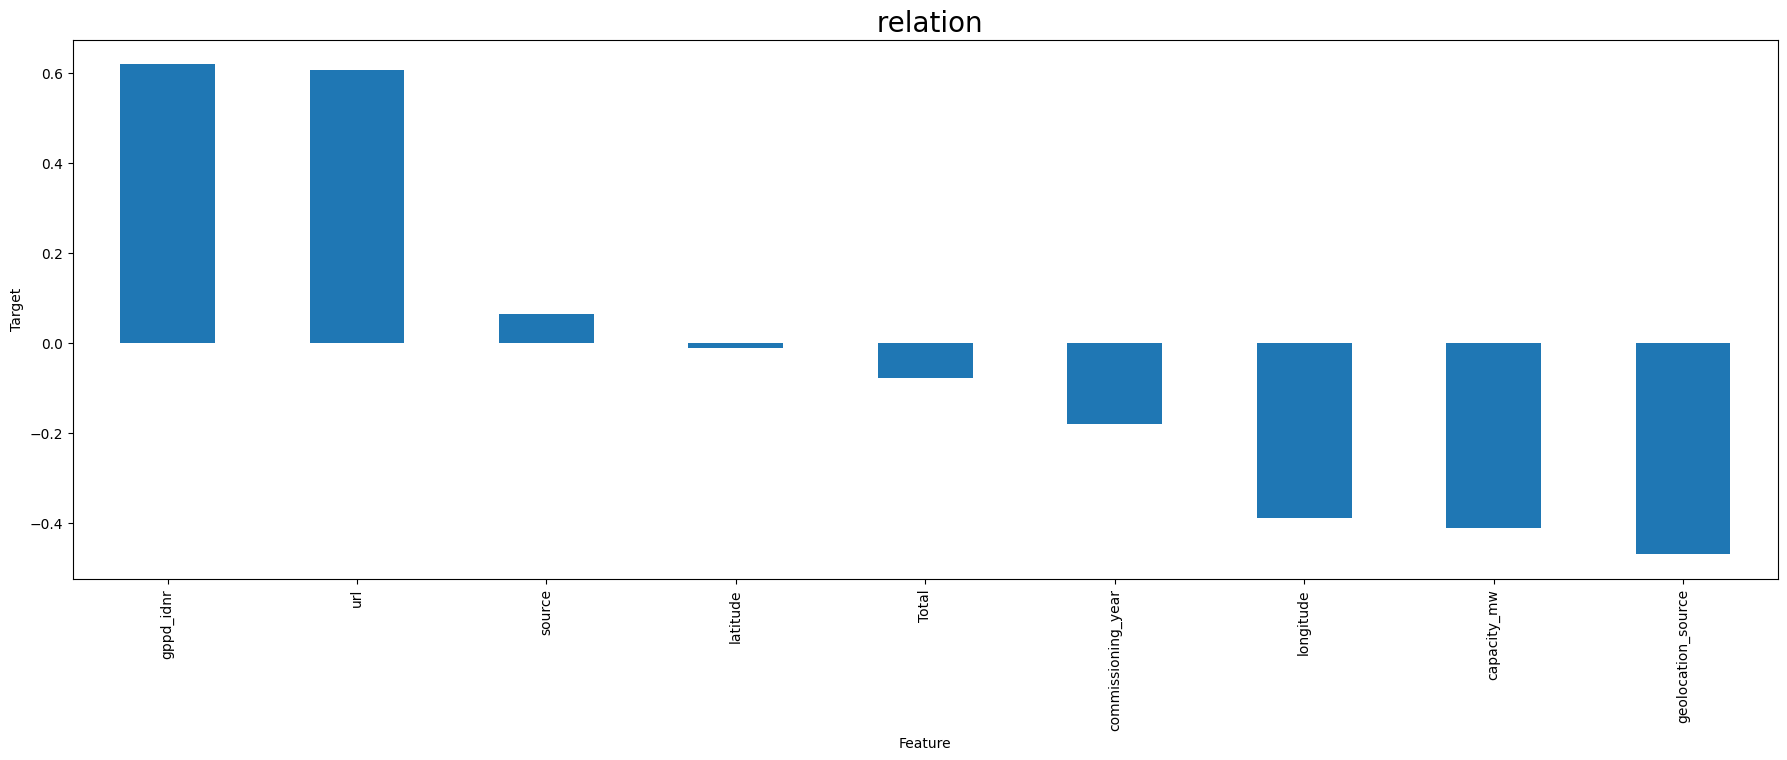

In [47]:
plt.figure(figsize=(22,7))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title(" relation",fontsize=20)
plt.show()

DATA preparing for model building

In [48]:
x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,source,url,geolocation_source,Total
0,0.743954,-0.634596,1.152348,-0.890240,1.203092,1.576096,0.446648,-1.057613,0.656413
1,0.224071,-0.411903,0.596111,-0.572384,-0.048126,3.121143,1.076159,0.401404,0.171392
2,1.482338,-0.549016,0.130221,-1.788662,-0.223711,-0.515660,1.523811,0.401404,0.049360
3,-1.731140,-0.325624,0.450428,3.318926,0.588673,-0.491890,-0.532591,0.401404,-1.062144
4,-1.727372,3.556927,0.139417,1.239583,1.554189,-0.491890,-0.532591,0.401404,2.097169


Variance Inflation Factor

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif[" VIF val"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Feature"]=x.columns
vif

,VIF val,Feature
0,2.878936,gppd_idnr
1,2.260916,capacity_mw
2,1.124394,latitude
3,1.279304,longitude
4,1.218555,commissioning_year
5,1.492232,source
6,1.876207,url
7,1.869403,geolocation_source
8,1.896871,Total


Resampling for Balancing data

In [51]:
y.value_counts()

primary_fuel
1    232
3    222
7    123
6    121
2     64
0     45
5     20
4      9
Name: count, dtype: int64

In [52]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1= SM.fit_resample(x,y)

In [53]:
y1.value_counts()

primary_fuel
6    232
1    232
7    232
2    232
3    232
0    232
5    232
4    232
Name: count, dtype: int64

In [54]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)

In [55]:
model={'dt':DecisionTreeClassifier(),'rf':RandomForestClassifier(),'lgR': LogisticRegression(),'nb':GaussianNB() ,
       'svc': SVC(kernel="linear", probability=True),'knn':KNeighborsClassifier(n_neighbors=3),'gb':GradientBoostingClassifier(),}     
print(model)
mod=['DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','GaussianNB','SVC','KNeighborsClassifier','GradientBoostingClassifier']


{'dt': DecisionTreeClassifier(), 'rf': RandomForestClassifier(), 'lgR': LogisticRegression(), 'nb': GaussianNB(), 'svc': SVC(kernel='linear', probability=True), 'knn': KNeighborsClassifier(n_neighbors=3), 'gb': GradientBoostingClassifier()}


In [56]:
for key, value in model.items():
    value.fit(x_train, y_train)
    
    if key == 'rf':
        print('RFC Feature Importances:', value.feature_importances_)
        print()
    
    elif key == 'dt':
        print('DT: Decision Trees do not have intercept or coefficients.')
        print()
    elif key == 'lgR':
        print('Logistic:', value.intercept_)
        print('Logistic coef:' ,  value.coef_)
        
    elif key == 'svm':
        print('svm intercept:', value.intercept_)
        print('svm coef:' ,  value.coef_)

    elif key == 'knn':
        print('KNN: k-Nearest Neighbors do not have intercept or coefficients.')
        print()

    elif key == 'gb':
         print('gradiant boosting do not have intercept or coefficients.')


DT: Decision Trees do not have intercept or coefficients.

RFC Feature Importances: [0.20399668 0.11621461 0.07834338 0.09159391 0.09729364 0.07327197
 0.10362616 0.12076874 0.11489091]

Logistic: [-0.95690557  2.53647509  1.52270024  1.84313408 -1.2595999  -0.0264572
 -1.29224476 -2.36710199]
Logistic coef: [[ 0.91610657 -1.33859067 -0.92992229 -0.0970842  -0.45461912  0.96978408
  -0.9768492   0.57505779  0.59814527]
 [-0.80111344  0.83925715  0.40358482  0.72201446  0.07140016  0.68731124
  -0.35583202  0.47096165  0.20862091]
 [-0.86995632  0.85365725  0.25292473  0.18969048  0.16042431  0.40120495
  -0.02139936  0.22721725 -0.91664687]
 [-1.27502771  0.03062676  0.62039962  0.40750702 -0.64665974 -1.31954905
  -0.49068333  0.37760482 -0.29476859]
 [-0.6291936   1.33877326 -0.12200067 -0.24290532 -0.28431689 -0.14566402
   0.44844786  0.04380054  0.22894616]
 [-0.55082869 -0.77960465 -0.26933509 -0.72782288  0.01712085  0.39224323
  -0.10730358  0.27860791 -0.40809559]
 [ 1.0770784

In [57]:

y_preds = {}

for key, value in model.items():
    value.fit(x_train, y_train)
    y_pred = value.predict(x_test)

    y_preds[key] = y_pred
y_pred

array([3, 3, 7, 2, 2, 3, 1, 1, 1, 2, 1, 1, 7, 7, 7, 6, 2, 6, 3, 6, 3, 5,
       3, 1, 6, 1, 6, 7, 1, 0, 7, 2, 1, 3, 0, 7, 1, 3, 7, 3, 3, 1, 1, 3,
       1, 7, 3, 7, 1, 7, 3, 0, 6, 3, 3, 5, 3, 1, 3, 1, 6, 6, 7, 3, 1, 1,
       0, 7, 1, 1, 1, 1, 1, 0, 3, 7, 7, 1, 6, 6, 7, 0, 1, 3, 3, 1, 1, 1,
       1, 7, 3, 3, 7, 3, 7, 3, 0, 1, 1, 2, 1, 1, 0, 0, 2, 3, 1, 7, 1, 7,
       3, 3, 3, 6, 1, 3, 0, 3, 1, 1, 3, 1, 6, 7, 1, 3, 7, 7, 1, 6, 3, 7,
       7, 1, 7, 1, 7, 1, 7, 1, 2, 1, 7, 3, 3, 3, 3, 6, 6, 1, 3, 2, 1, 7,
       6, 3, 3, 3, 7, 3, 1, 6, 6, 3, 1, 1, 3, 3, 1, 3, 3, 1, 7, 3, 6, 1,
       2, 6, 0, 1, 1, 7, 3, 3, 1, 7, 1, 3, 1, 7, 3, 6, 3, 2, 3, 7, 1, 3,
       3, 1, 1, 3, 3, 7, 1, 2, 2, 2, 1, 3, 3, 3, 6, 2, 0, 0, 0, 3, 1, 1,
       5, 3, 6, 3, 3, 1, 3, 3, 3, 7, 7, 3, 3, 1, 1, 1, 1, 1, 3, 6, 3, 2,
       5, 6, 6, 1, 1, 1, 1, 3, 1])

In [58]:
value.score(x_train,y_train)

1.0

In [59]:
value.score(x_test,y_test)

0.8804780876494024

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
import numpy as np

y_probs = {}
mae = {}
mse = {}
r2 = {}
rmse = {}
acu = {}

# Train and evaluate models
for key, value in model.items():
    value.fit(x_train, y_train)
    y_pred = value.predict(x_test)
    y_probs[key] = model[key].predict_proba(x_test)[:, 1] 

    mae[key] = mean_absolute_error(y_test, y_pred)
    mse[key] = mean_squared_error(y_test, y_pred)
    r2[key] = r2_score(y_test, y_pred)
    rmse[key] = np.sqrt(mse[key])
    acu[key] = accuracy_score(y_test, y_pred)

    print("\nMetrics for", key)
    print("R-squared:", r2[key])
    print("Root Mean Squared Error:", rmse[key])
    print("Accuracy:", acu[key])

    # Print classification report and confusion matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print('*' * 50)

best_model = max(acu, key=acu.get)
print("\nBest Model based on Accuracy:", best_model)

best_model_rmse = min(rmse, key=rmse.get)
print("Best Model based on RMSE:", best_model_rmse)



Metrics for dt
R-squared: 0.8871310604202437
Root Mean Squared Error: 0.7832916549619737
Accuracy: 0.8446215139442231
Confusion Matrix:
 [[ 9  7  0  0  0  1  0  0]
 [ 4 59  4  8  0  1  0  0]
 [ 0  1 12  3  0  0  0  1]
 [ 0  3  1 63  0  0  0  0]
 [ 0  2  0  2  0  0  0  0]
 [ 0  0  0  1  0  3  0  0]
 [ 0  0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  0 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.53      0.60        17
           1       0.82      0.78      0.80        76
           2       0.71      0.71      0.71        17
           3       0.82      0.94      0.88        67
           4       0.00      0.00      0.00         4
           5       0.60      0.75      0.67         4
           6       1.00      1.00      1.00        26
           7       0.98      1.00      0.99        40

    accuracy                           0.84       251
   macro avg       0.70      0.71      0.70       251
weighted avg       0.83  

In [61]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)

GradientBoostingClassifier()

In [62]:
cross_val_score(GB,x,y,cv=5)

array([0.79761905, 0.88622754, 0.8502994 , 0.81437126, 0.82035928])

In [63]:
cross_val_score(GB,x,y,cv=5).mean()

0.8301753635585971

In [64]:
params = {
    "learning_rate": [0.05, 0.1, 0.2, 0.3],
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7, 9],
    "subsample": [0.8, 0.9, 1.0],  
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [65]:
# grid_search = GridSearchCV(estimator=GB, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(x_train, y_train)

In [66]:
y_pred=GB.predict(x_test)
print(confusion_matrix(y_test,y_pred))

[[11  5  0  0  0  0  0  1]
 [ 2 65  3  6  0  0  0  0]
 [ 0  4 11  0  0  2  0  0]
 [ 0  1  1 65  0  0  0  0]
 [ 0  2  0  2  0  0  0  0]
 [ 0  0  1  1  0  2  0  0]
 [ 0  0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  0 40]]


<Axes: >

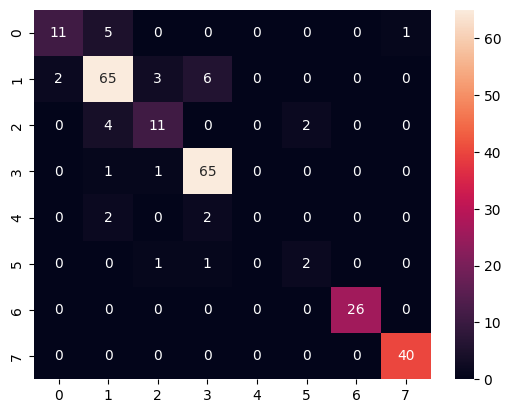

In [67]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.65      0.73        17
           1       0.84      0.86      0.85        76
           2       0.69      0.65      0.67        17
           3       0.88      0.97      0.92        67
           4       0.00      0.00      0.00         4
           5       0.50      0.50      0.50         4
           6       1.00      1.00      1.00        26
           7       0.98      1.00      0.99        40

    accuracy                           0.88       251
   macro avg       0.72      0.70      0.71       251
weighted avg       0.86      0.88      0.87       251



In [69]:
prediction=GB.predict(x_test)  
prediction


array([3, 3, 7, 2, 2, 3, 1, 1, 1, 2, 1, 1, 7, 7, 7, 6, 2, 6, 3, 6, 3, 5,
       3, 1, 6, 1, 6, 7, 1, 0, 7, 2, 1, 3, 0, 7, 1, 3, 7, 3, 3, 1, 1, 3,
       1, 7, 3, 7, 1, 7, 3, 0, 6, 3, 3, 5, 3, 1, 3, 1, 6, 6, 7, 3, 1, 1,
       7, 7, 1, 1, 1, 1, 1, 0, 3, 7, 7, 1, 6, 6, 7, 0, 1, 3, 3, 1, 1, 1,
       1, 7, 3, 3, 7, 3, 7, 3, 0, 1, 1, 2, 1, 1, 0, 0, 2, 3, 1, 7, 1, 7,
       3, 3, 3, 6, 1, 3, 0, 3, 1, 1, 3, 1, 6, 7, 1, 3, 7, 7, 1, 6, 3, 7,
       7, 1, 7, 1, 7, 1, 7, 1, 2, 1, 7, 3, 3, 3, 3, 6, 6, 1, 3, 2, 1, 7,
       6, 3, 3, 3, 7, 3, 1, 6, 6, 3, 1, 1, 3, 3, 1, 3, 3, 1, 7, 3, 6, 1,
       2, 6, 0, 1, 1, 7, 3, 3, 1, 7, 1, 3, 1, 7, 3, 6, 3, 2, 3, 7, 1, 3,
       3, 1, 1, 3, 3, 7, 1, 2, 2, 2, 1, 3, 3, 3, 6, 2, 0, 0, 0, 3, 1, 1,
       5, 3, 6, 3, 3, 1, 3, 3, 3, 7, 7, 3, 3, 1, 1, 1, 1, 1, 3, 6, 3, 2,
       5, 6, 6, 1, 1, 1, 1, 3, 1])

checking the prediction

In [70]:
prediction=df.iloc[2]
print(prediction)

gppd_idnr               853.000000
capacity_mw              39.200000
latitude                 21.903800
longitude                69.373200
primary_fuel              7.000000
commissioning_year     1994.744603
source                   21.000000
url                     205.000000
geolocation_source        2.000000
Total                 12159.276445
Name: 2, dtype: float64


SAVING THE BEST MODEL

In [73]:
import pickle
filename = 'C-gp_best_model.pkl'
pickle.dump(GB, open(filename, 'wb'))

In [79]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred},columns=['Y Test','Pred'])
data.head()

,Y Test,Pred
656,1,3
892,3,3
302,7,7
866,2,2
173,3,2


# prediction for Target : capacity_mw

In [80]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [81]:
print("feature dimension",x.shape)
print("label dimension",y.shape)

feature dimension (836, 9)
label dimension (836,)


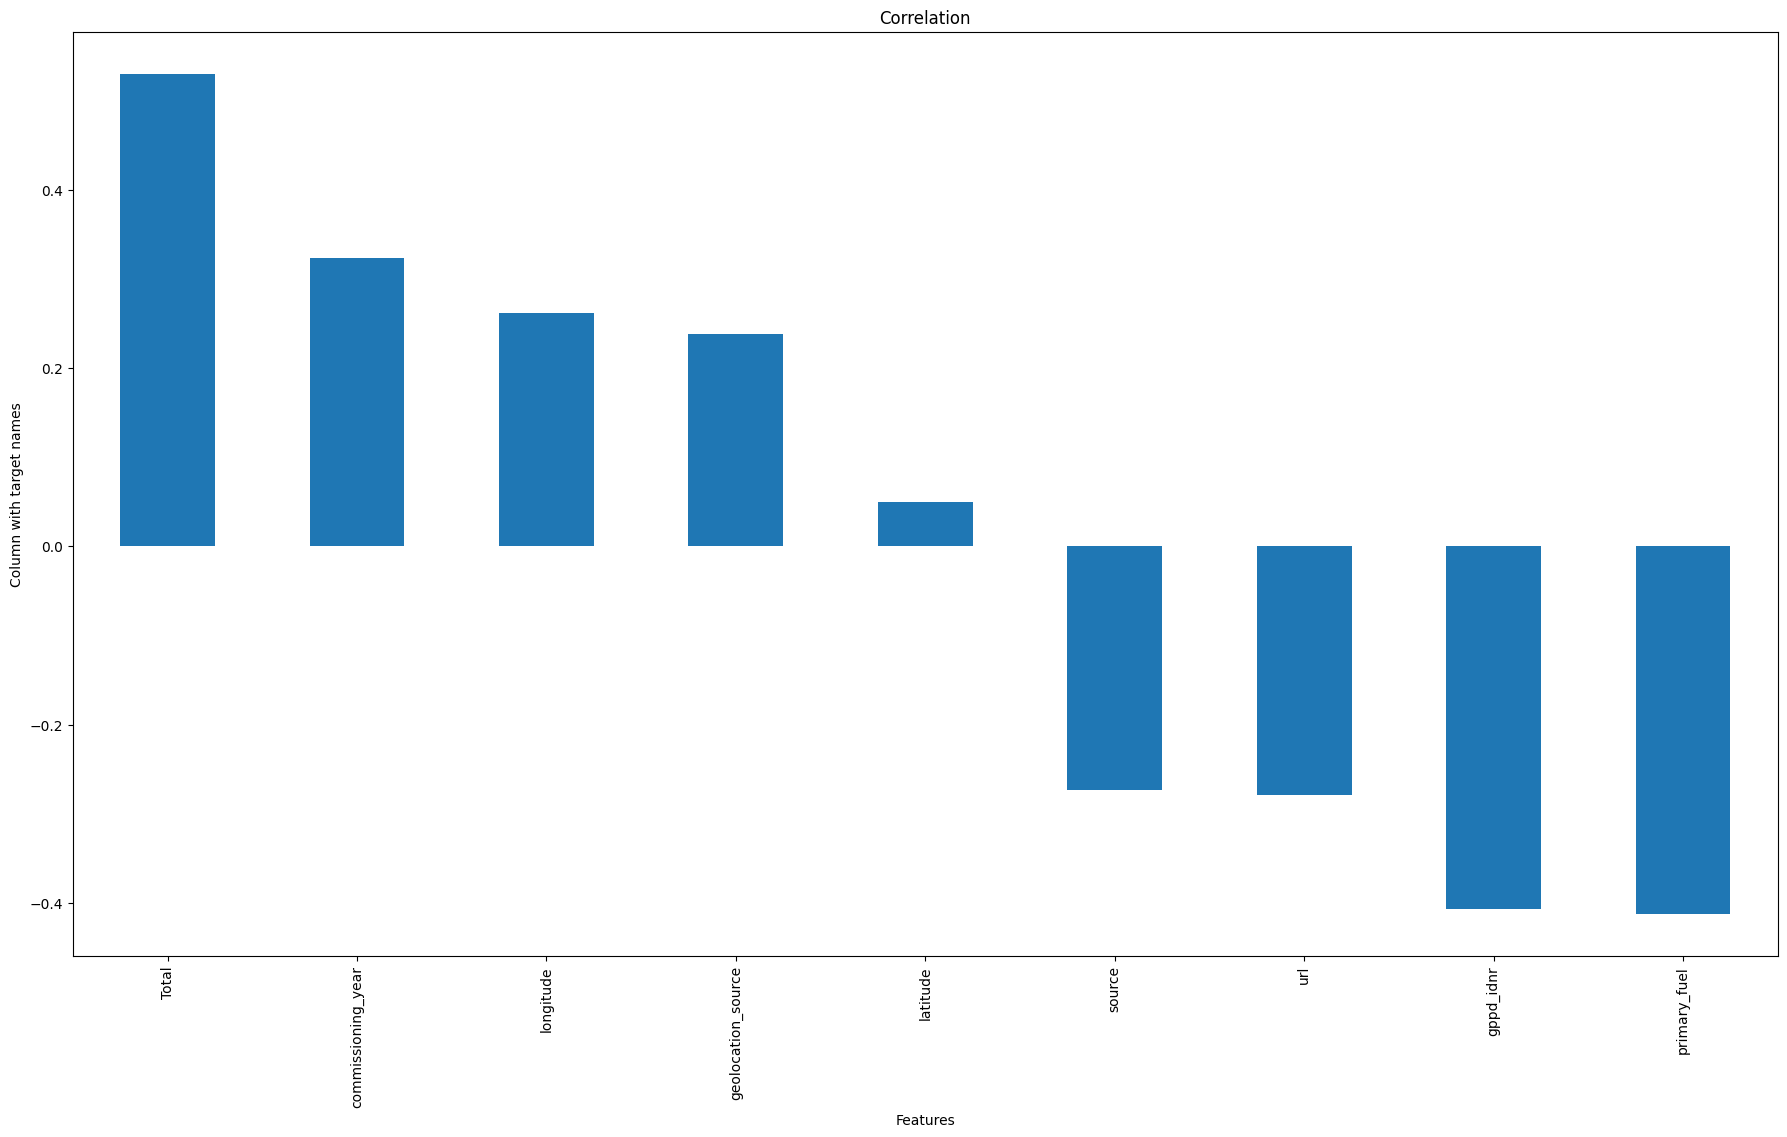

In [82]:
plt.figure(figsize =(22, 12))
df.corr()['capacity_mw'].sort_values(ascending = False).drop(['capacity_mw']).plot(kind ='bar')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

In [83]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head(2)

,gppd_idnr,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,Total
0,0.743954,1.152348,-0.890240,1.172259,1.203092,1.576096,0.446648,-1.057613,0.656413
1,0.224071,0.596111,-0.572384,-0.989206,-0.048126,3.121143,1.076159,0.401404,0.171392


In [85]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=20)

In [86]:
vif = pd.DataFrame()
vif[" VIF val"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Feature"]=x.columns
vif

,VIF val,Feature
0,2.655109,gppd_idnr
1,1.121643,latitude
2,1.300313,longitude
3,3.711594,primary_fuel
4,1.211850,commissioning_year
5,2.009490,source
6,2.874232,url
7,3.064306,geolocation_source
8,1.214257,Total


In [89]:
model={'dt':DecisionTreeRegressor(),'rf':RandomForestRegressor(),'lR': LinearRegression(),
       'svr': SVR(),'knn':KNeighborsRegressor(n_neighbors=3),'LS':Lasso(),'RG':Ridge(),
       'gb':GradientBoostingRegressor(),}     
print(model)

{'dt': DecisionTreeRegressor(), 'rf': RandomForestRegressor(), 'lR': LinearRegression(), 'svr': SVR(), 'knn': KNeighborsRegressor(n_neighbors=3), 'LS': Lasso(), 'RG': Ridge(), 'gb': GradientBoostingRegressor()}


In [90]:
y_preds = {}
for key, value in model.items():
    value.fit(x_train, y_train)
    y_pred = value.predict(x_test)
    y_preds[key] = y_pred
y_pred

array([  24.06180581,   77.03686815,   35.67508513, 1195.961761  ,
         41.52489911,  212.72150009,   25.42393568,   20.91887654,
        141.74549073,  223.45964969,  106.28234656,   24.64004677,
        221.11710929,  759.31414602,   57.41108021,  322.49557069,
       1125.76740485,   56.67059187,  623.96057395,   25.42393568,
        934.54980483,  658.57224404, 1414.39893965,   63.48943978,
       1229.31117316, 1004.23571453,  574.85788142,   31.24236027,
         25.42393568,   83.57201841,  169.7335506 ,   14.64036426,
        221.82625077,  120.23511933,  513.04943606,  810.3168594 ,
        559.93533577,   24.64004677, 1277.92806656,  892.1848355 ,
         48.09997958,  561.08630578,   14.64036426,   36.88027085,
        281.59675966,   93.50094171,  549.70247821,   15.21860523,
        417.51837856,  263.74696375, 1322.43933437, 1338.47202362,
         25.42393568, 1343.12487212,  135.53499959,  906.52965423,
        554.20037821,  298.94478705,  911.70820875,  137.45500

In [91]:
value.score(x_train,y_train)


0.9179569281783742

In [92]:
value.score(x_test,y_test)

0.5821028226412143

In [93]:
mae = {}
mse = {}
r2 = {}
rmse = {}
acc={}
for key, value in y_preds.items():
    mae[key] = mean_absolute_error(y_test, value)
    mse[key] = mean_squared_error(y_test, value)
    r2[key] = r2_score(y_test, value)
    rmse[key] = np.sqrt(mse[key])
    
    
details = pd.DataFrame({
    'MAE': mae,
    'MSE': mse,
    'R-squared': r2,
    'RMSE': rmse,
})
print("\n details for each model:")
print(details)
best_model =min(rmse, key=rmse.get)
print("\nBest Model based on RMSE:", best_model)



 details for each model:
            MAE            MSE  R-squared        RMSE
dt   181.826579  108165.937787   0.470533  328.885904
rf   156.035210   75636.222336   0.629764  275.020403
lR   207.053458   96803.854101   0.526150  311.133177
svr  256.967772  245596.014007  -0.202181  495.576446
knn  160.624576   78793.544304   0.614309  280.701878
LS   206.373492   96902.804306   0.525665  311.292153
RG   206.943512   96813.292522   0.526103  311.148345
gb   166.863265   85373.044957   0.582103  292.186661

Best Model based on RMSE: rf


Hyperparameter tunning

In [94]:
final_model = GradientBoostingRegressor()
final_model.fit(x_train, y_train)

GradientBoostingRegressor()

In [95]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}
grid_search = GridSearchCV(estimator=final_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

final_model = GradientBoostingRegressor(**best_params)
final_model.fit(x_train, y_train)

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.9}


In [98]:
prediction=final_model.predict(x_test)  
prediction

array([  30.74139306,   85.77487349,   28.59093728, 1299.52612408,
         73.17458226,  298.49450749,   19.07350542,   13.0142049 ,
        123.57981543,  355.03980086,  159.87750121,   13.22687187,
        307.19958509,  647.04895003,   45.70357362,  284.93670009,
        947.01172693,   45.70357362,  563.82667102,   19.07350542,
        891.83484135,  621.7052567 , 1525.64384541,   53.07173789,
       1261.3463653 ,  932.24503604,  601.0392228 ,   22.74430372,
         19.07350542,  165.82686265,  159.86820316,   11.70534115,
        348.487718  ,  182.21399358,  461.17010189,  897.95916007,
        485.54214622,   13.0142049 , 1222.04640986,  771.97578369,
         53.28440486,  559.58151485,   11.70534115,   45.91624058,
        201.59625084,   95.47546127,  618.11991976,   11.70534115,
        392.46469096,  248.004242  , 1342.26120929, 1015.47971953,
         19.07350542, 1335.25366487,  117.18854423,  930.30024126,
        374.60207564,  187.84651202,  823.60769875,  143.37656

In [99]:
prediction=df.iloc[30]
print(prediction)

gppd_idnr               668.000000
capacity_mw              13.200000
latitude                 14.479100
longitude                76.348200
primary_fuel              7.000000
commissioning_year     1994.603363
source                   21.000000
url                     199.000000
geolocation_source        2.000000
Total                 12258.699391
Name: 31, dtype: float64


SAVING THE BEST MODEL

In [101]:
import pickle
filename = 'capacity_best_model.pkl'
pickle.dump(final_model, open(filename, 'wb'))